___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 10ms/step - loss: 0.8107 - accuracy: 0.3128
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.3203
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7881 - accuracy: 0.3315
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.3482
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7676 - accuracy: 0.3799
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7578 - accuracy: 0.3948
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7491 - accuracy: 0.4153
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7404 - accuracy: 0.4488
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7319 - accuracy: 0.4618
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7238 - accuracy: 0.4823
Epoch 11/200
6/6 [==========

6/6 [==============================] - 0s 5ms/step - loss: 0.5420 - accuracy: 0.7393
Epoch 85/200
6/6 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7374
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5405 - accuracy: 0.7374
Epoch 87/200
6/6 [==============================] - 0s 7ms/step - loss: 0.5397 - accuracy: 0.7374
Epoch 88/200
6/6 [==============================] - 0s 5ms/step - loss: 0.5389 - accuracy: 0.7356
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5382 - accuracy: 0.7374
Epoch 90/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.7374
Epoch 91/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7374
Epoch 92/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7374
Epoch 93/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.7374
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.7635
Epoch 168/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4989 - accuracy: 0.7635
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4985 - accuracy: 0.7635
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4982 - accuracy: 0.7635
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.7616
Epoch 172/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4974 - accuracy: 0.7616
Epoch 173/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4971 - accuracy: 0.7616
Epoch 174/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.7616
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7616
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4960 - accuracy: 0.7616
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

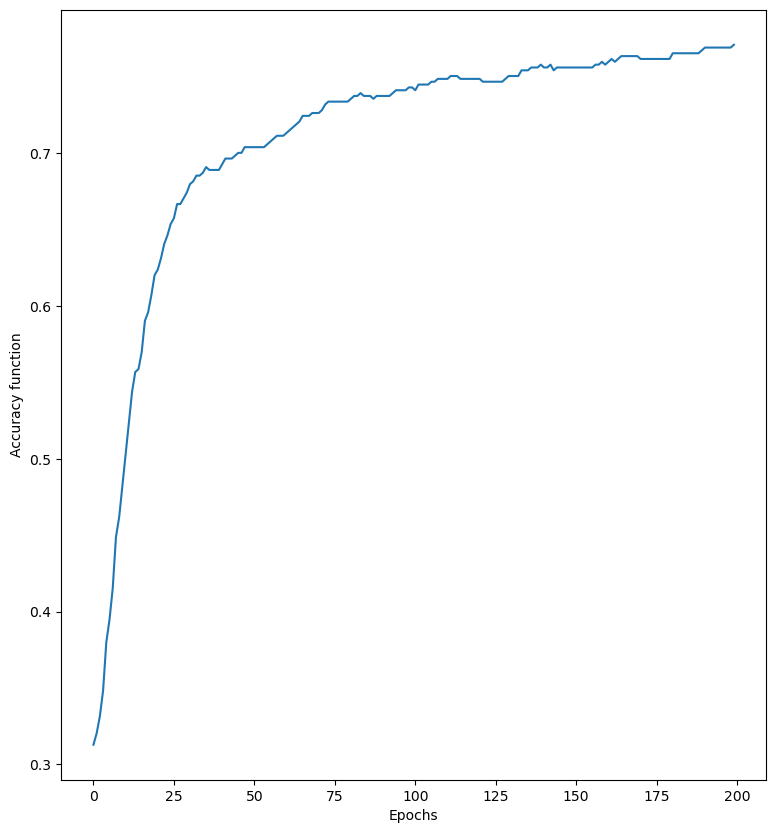

In [9]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 2ms/step


In [11]:
Y_pred

array([[0.34223694],
       [0.1649716 ],
       [0.14345658],
       [0.2839789 ],
       [0.5812208 ],
       [0.5490951 ],
       [0.07705152],
       [0.18618138],
       [0.5519262 ],
       [0.56544477],
       [0.3524034 ],
       [0.6894845 ],
       [0.48927218],
       [0.3271557 ],
       [0.0882544 ],
       [0.2309855 ],
       [0.12501268],
       [0.10387224],
       [0.24908757],
       [0.49915075],
       [0.31140843],
       [0.09946945],
       [0.6570182 ],
       [0.08888392],
       [0.66257703],
       [0.6643228 ],
       [0.10786801],
       [0.10235237],
       [0.41517138],
       [0.15582478],
       [0.63719803],
       [0.6701159 ],
       [0.65997136],
       [0.22088742],
       [0.62077284],
       [0.66615653],
       [0.5492956 ],
       [0.2621978 ],
       [0.51514924],
       [0.15880696],
       [0.08967053],
       [0.35406902],
       [0.45095247],
       [0.35591307],
       [0.14628652],
       [0.592032  ],
       [0.63808376],
       [0.217

In [12]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 2ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.769 	 0.695 	 0.606
  Test 	 0.701 	 0.571 	 0.550


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [14]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [15]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [19]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [22]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 211ms/step - loss: 1.1689 - accuracy: 0.4250 - val_loss: 1.3809 - val_accuracy: 0.7000
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 1.3681 - accuracy: 0.6583 - val_loss: 1.0073 - val_accuracy: 0.6333
Epoch 3/200
2/2 [==============================] - 0s 48ms/step - loss: 0.9217 - accuracy: 0.6750 - val_loss: 0.7724 - val_accuracy: 0.6333
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 0.7013 - accuracy: 0.6750 - val_loss: 0.6680 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 0s 36ms/step - loss: 0.6498 - accuracy: 0.6667 - val_loss: 0.5568 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 38ms/step - loss: 0.5426 - accuracy: 0.6833 - val_loss: 0.4753 - val_accuracy: 0.7333
Epoch 7/200
2/2 [==============================] - 0s 36ms/step - loss: 0.4744 - accuracy: 0.6833 - val_loss: 0.4390 - val_accuracy: 0.8000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 46ms/step - loss: 0.1699 - accuracy: 0.9250 - val_loss: 0.1872 - val_accuracy: 0.8667
Epoch 60/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1065 - accuracy: 0.9500 - val_loss: 0.1276 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1675 - accuracy: 0.9333 - val_loss: 0.4900 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 39ms/step - loss: 0.2631 - accuracy: 0.8750 - val_loss: 0.1245 - val_accuracy: 0.9667
Epoch 63/200
2/2 [==============================] - 0s 36ms/step - loss: 0.1542 - accuracy: 0.9333 - val_loss: 0.0904 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0939 - accuracy: 0.9750 - val_loss: 0.2867 - val_accuracy: 0.8667
Epoch 65/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1286 - accuracy: 0.9500 - val_loss: 0.2145 - val_accuracy: 0.8667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 38ms/step - loss: 0.2123 - accuracy: 0.9083 - val_loss: 0.3364 - val_accuracy: 0.8333
Epoch 118/200
2/2 [==============================] - 0s 37ms/step - loss: 0.2193 - accuracy: 0.9167 - val_loss: 0.1902 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 36ms/step - loss: 0.1223 - accuracy: 0.9500 - val_loss: 0.1513 - val_accuracy: 0.8667
Epoch 120/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1003 - accuracy: 0.9583 - val_loss: 0.1734 - val_accuracy: 0.8667
Epoch 121/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0998 - accuracy: 0.9583 - val_loss: 0.1201 - val_accuracy: 0.9667
Epoch 122/200
2/2 [==============================] - 0s 37ms/step - loss: 0.1186 - accuracy: 0.9583 - val_loss: 0.3529 - val_accuracy: 0.8333
Epoch 123/200
2/2 [==============================] - 0s 32ms/step - loss: 0.1817 - accuracy: 0.9250 - val_loss: 0.3221 - val_accuracy: 0.8000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0761 - accuracy: 0.9750 - val_loss: 0.0709 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0805 - accuracy: 0.9667 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0692 - accuracy: 0.9833 - val_loss: 0.0698 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.0979 - val_accuracy: 0.9333
Epoch 179/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0709 - accuracy: 0.9667 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0674 - accuracy: 0.9833 - val_loss: 0.0684 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0691 - accuracy: 0.9833 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 

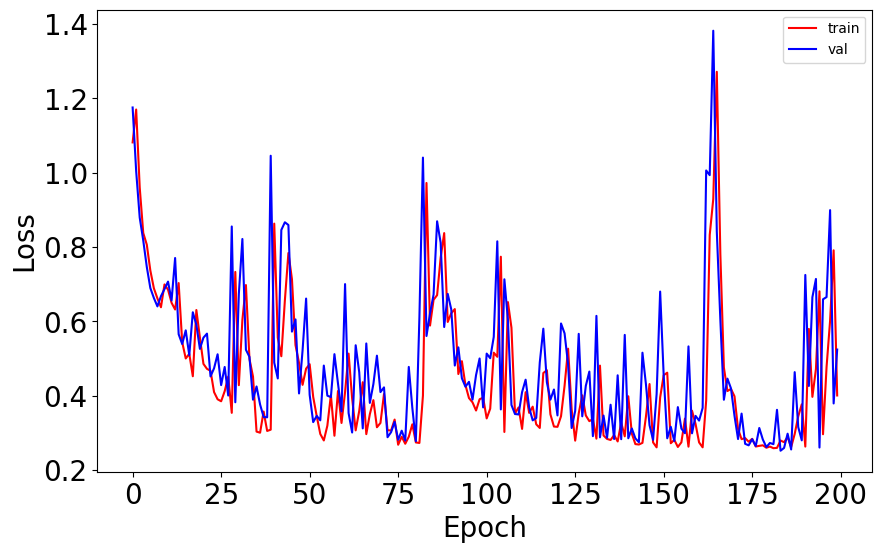

In [23]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 32ms/step


In [25]:
Y_pred

array([[2.07402099e-05, 3.69791925e-01, 6.30187392e-01],
       [9.98972535e-01, 1.02749851e-03, 3.86061110e-13],
       [1.76874043e-15, 7.42597738e-04, 9.99257386e-01],
       [1.24664457e-05, 3.33470881e-01, 6.66516662e-01],
       [1.98414491e-05, 3.66547614e-01, 6.33432567e-01],
       [9.97773826e-01, 2.22610589e-03, 4.13777866e-12],
       [1.00930678e-02, 8.21546853e-01, 1.68359995e-01],
       [8.86078766e-09, 5.54000922e-02, 9.44599867e-01],
       [7.68086181e-07, 1.76769629e-01, 8.23229671e-01],
       [1.92659826e-03, 7.26232708e-01, 2.71840662e-01],
       [4.23920277e-08, 8.42633918e-02, 9.15736616e-01],
       [9.97247517e-01, 2.75242515e-03, 1.07857178e-11],
       [9.99786198e-01, 2.13762367e-04, 7.70341568e-15],
       [9.96784449e-01, 3.21556744e-03, 1.48027528e-11],
       [9.99247432e-01, 7.52621738e-04, 2.28498698e-13],
       [2.15976743e-05, 3.72771919e-01, 6.27206445e-01],
       [6.89061828e-12, 7.61478581e-03, 9.92385149e-01],
       [9.08078800e-04, 6.71514

In [26]:
Y_prob

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 20ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.850 	 0.897 	 0.850
  Test 	 0.800 	 0.871 	 0.800
